# Linear Regression(线性回归)

https://www.statsmodels.org/stable/regression.html

适用于自变量X和因变量Y为线性关系，具体来说，画出散点图可以用一条直线来近似拟合。一般线性模型要求观测值之间相互独立、残差(因变量)服从正态分布、残差(因变量)方差齐性
统计模型被假定为 Y=Xβ+μ, μ∼N(0,Σ)

**Examples**

In [10]:
#加载模块和数据
import numpy as np
import statsmodels.api as sm
spector_data = sm.datasets.spector.load()
spector_data.exog = sm.add_constant(spector_data.exog,prepend = False)

#训练并输出OLS模型
mod = sm.OLS(spector_data.endog,spector_data.exog)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Sat, 26 Oct 2019   Prob (F-statistic):            0.00157
Time:                        09:51:13   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

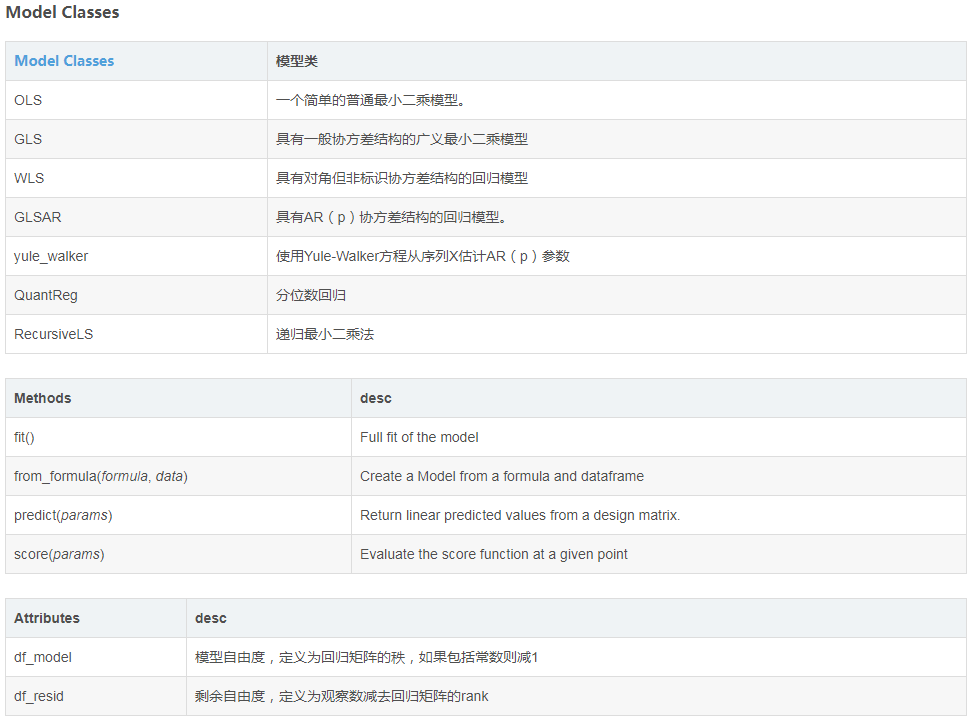

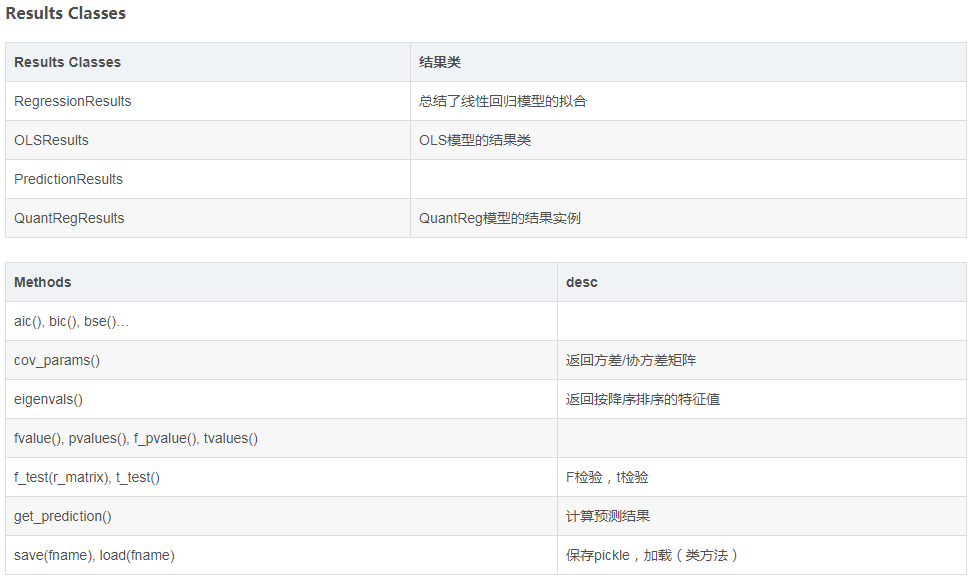

# Generalized Linear(广义线性回归)

http://www.statsmodels.org/stable/glm.html#module-reference

是为了克服线性回归模型的缺点出现的，是线性回归模型的推广。首先自变量可以是离散的，也可以是连续的。离散的可以是0-1变量，也可以是多种取值的变量。广义线性模型又取消了对残差(因变量)服从正态分布的要求。残差不一定要服从正态分布，可以服从二项、泊松、负二项、正态、伽马、逆高斯等分布，这些分布被统称为指数分布族。
与线性回归模型相比较，有以下推广：

    随机误差项不一定服从正态分布，可以服从二项、泊松、负二项、正态、伽马、逆高斯等分布，这些分布被统称为指数分布族。
    引入link函数g(⋅)。因变量和自变量通过联接函数产生影响。根据不同的数据，可以自由选择不同的模型。大家比较熟悉的Logit模型就是使用Logit联接、随机误差项服从二项分布得到模型。
The statistical model for each observation ii is assumed to be
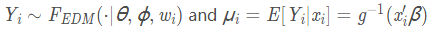

**Examples**

In [20]:
import statsmodels.api as sm
data = sm.datasets.scotland.load()
data.exog = sm.add_constant(data.exog)

gamma_model = sm.GLM(data.endog,data.exog,family = sm.families.Gamma())
gamma_results = gamma_model.fit()
print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                   Gamma   Df Model:                            7
Link Function:          inverse_power   Scale:                       0.0035843
Method:                          IRLS   Log-Likelihood:                -83.017
Date:                Sat, 26 Oct 2019   Deviance:                     0.087389
Time:                        10:08:46   Pearson chi2:                   0.0860
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0178      0.011     -1.548      0.122      -0.040       0.005
x1          4.962e-05   1.62e-05      3.060      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:302: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


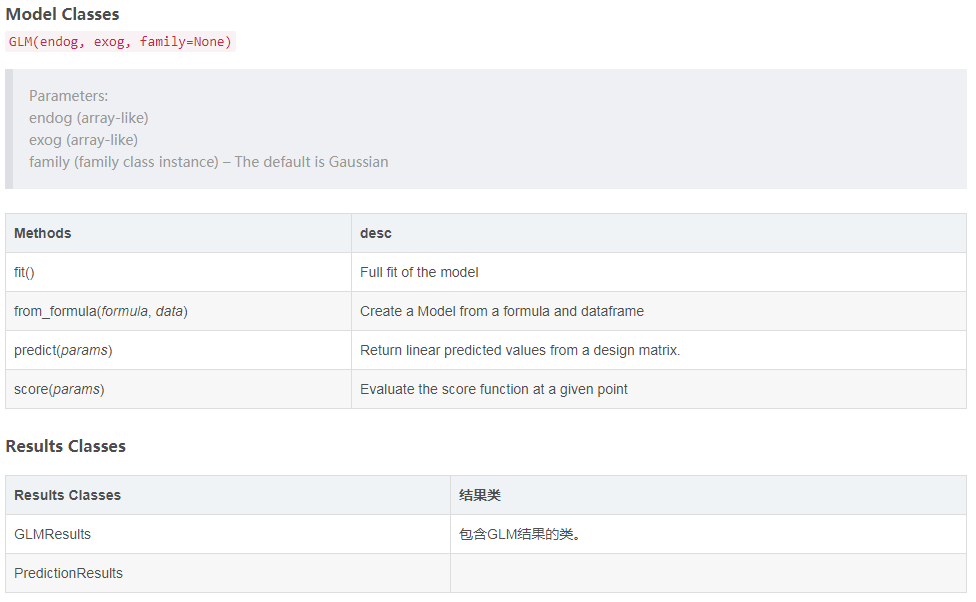

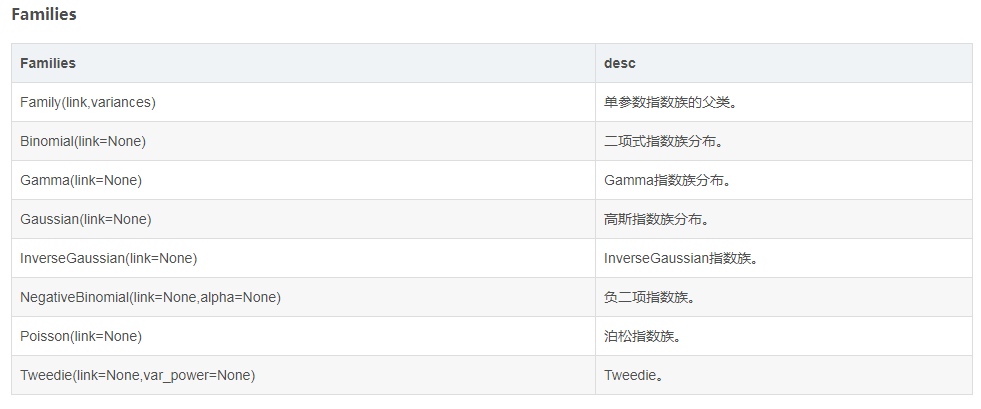

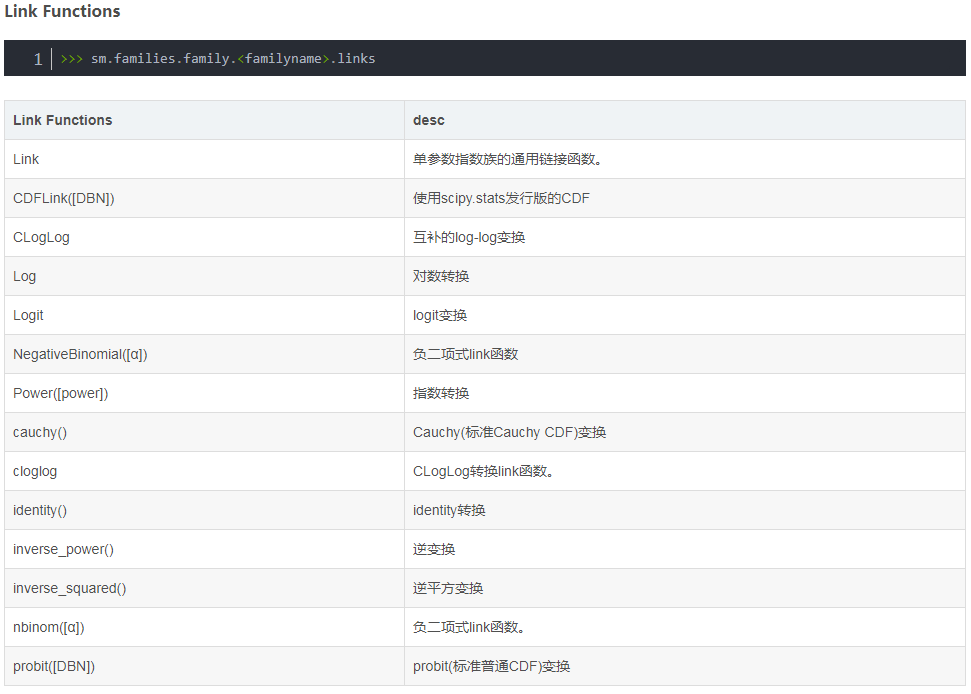

# Generalized Estimating Equations(广义估计方程)

http://www.statsmodels.org/stable/gee.html

实际工作中一些资料由于部分观察值含有非独立或相关的信息，不能用传统的一般线性（或广义线性进行分析），故而发展出了广义估计方程。如纵向数据，重复测量数据，整群抽样设计资料，聚集性资料或是多次层次系统结构资料。

**Examples**

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data = sm.datasets.get_rdataset('epil', package='MASS').data
fam = sm.families.Poisson()
ind = sm.cov_struct.Exchangeable()
mod = smf.gee("y ~ age + trt + base", "subject", data,
              cov_struct=ind, family=fam)

res = mod.fit()
print(res.summary())

timeout: The read operation timed out

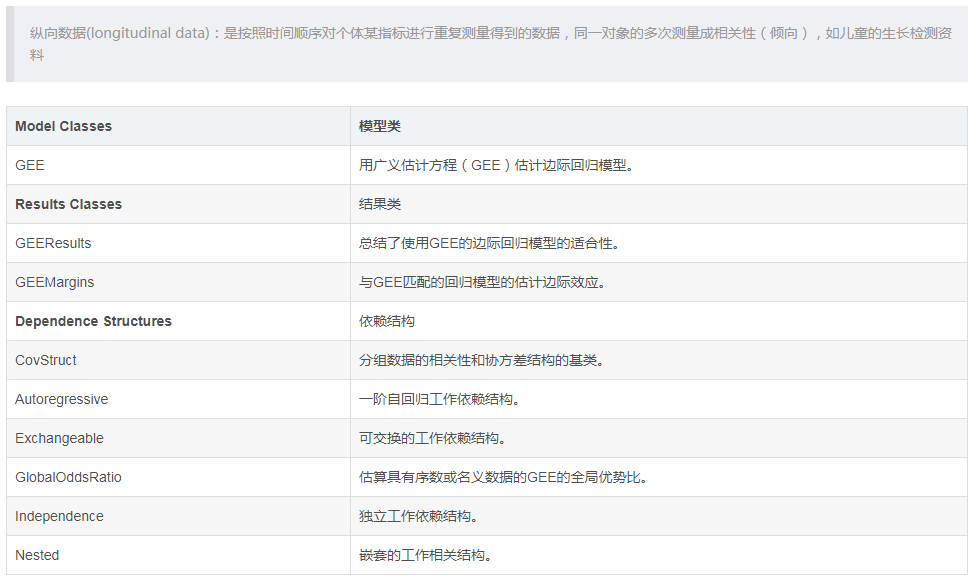

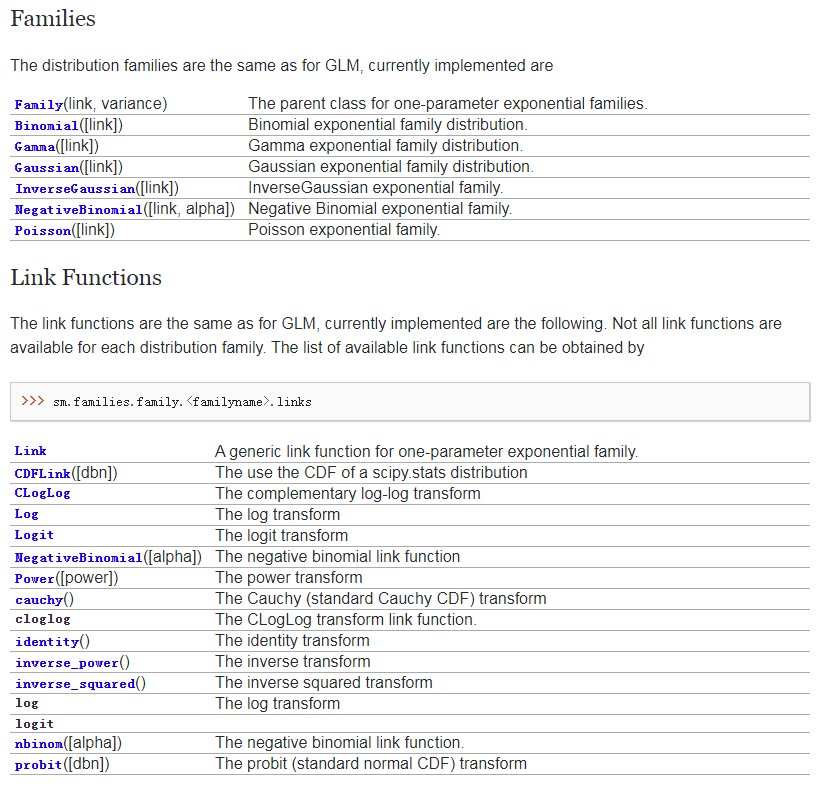

# Robust Linear Models(稳健的线性模型)

http://www.statsmodels.org/stable/rlm.html

稳健回归(robust regression)是将稳健估计方法用于回归模型，以拟合大部分数据存在的结构，同时可识别出潜在可能的离群点、强影响点或与模型假设相偏离的结构。当误差服从正态分布时，其估计几乎和最小二乘估计一样好，而最小二乘估计条件不满足时，其结果优于最小二乘估计。

In [26]:
#加载模块和数据
import statsmodels.api as sm
data = sm.datasets.stackloss.load()
data.exog = sm.add_constant(data.exog)

#训练模型并输出结果
rlm_model = sm.RLM(data.endog, data.exog, M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit()
print(rlm_results.params)

[-41.02649835   0.82938433   0.92606597  -0.12784672]


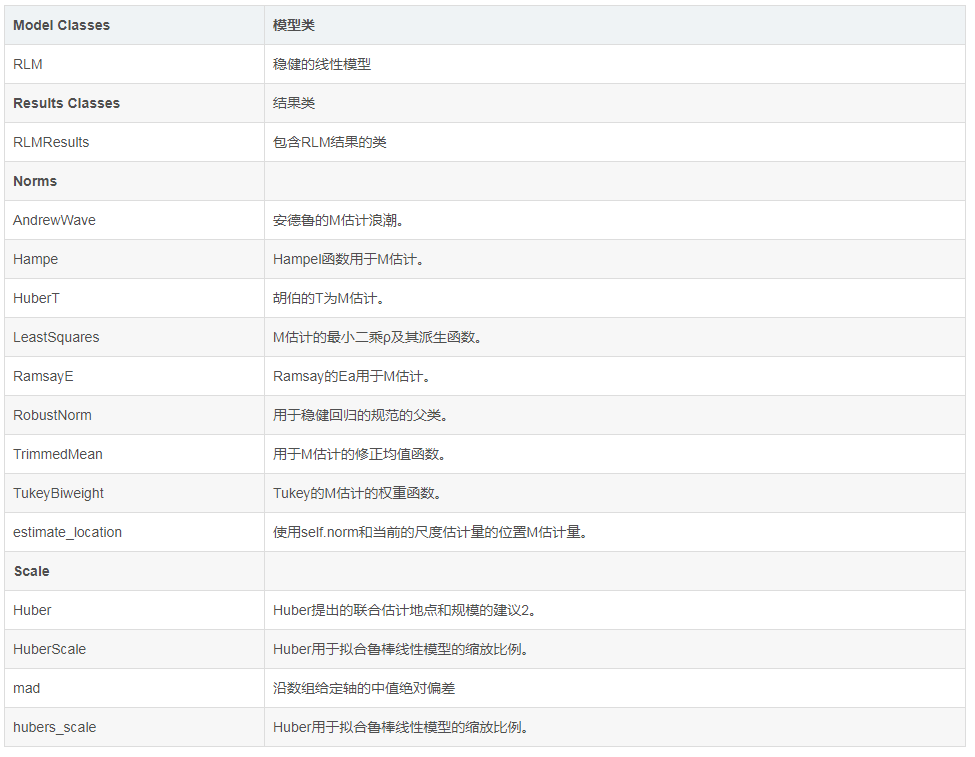

# Linear Mixed Effects Models(线性混合效应模型)

http://www.statsmodels.org/stable/mixed_linear.html

在线性模型中加入随机效应项，消了观测值之间相互独立和残差(因变量)方差齐性的要求。

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data = sm.datasets.get_rdataset("dietox", "geepack").data
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
mdf = md.fit()
print(mdf.summary())

URLError: <urlopen error timed out>

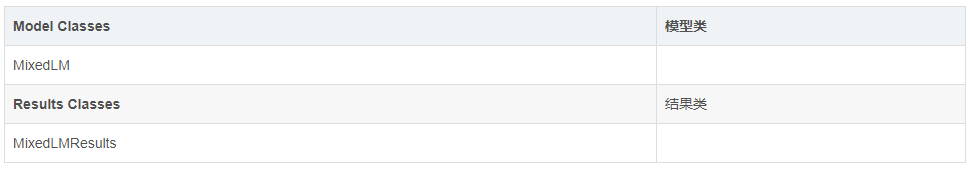

# Regression with Discrete Dependent Variable(具有离散因变量的回归)

http://www.statsmodels.org/stable/discretemod.html

In [28]:
spector_data = sm.datasets.spector.load()
spector_data.exog = sm.add_constant(spector_data.exog)
logit_mod = sm.Logit(spector_data.endog, spector_data.exog)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.402801
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   32
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Sat, 26 Oct 2019   Pseudo R-squ.:                  0.3740
Time:                        10:47:23   Log-Likelihood:                -12.890
converged:                       True   LL-Null:                       -20.592
                                        LLR p-value:                  0.001502
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.0213      4.931     -2.641      0.008     -22.687      -3.356
x1             2.8261      1.

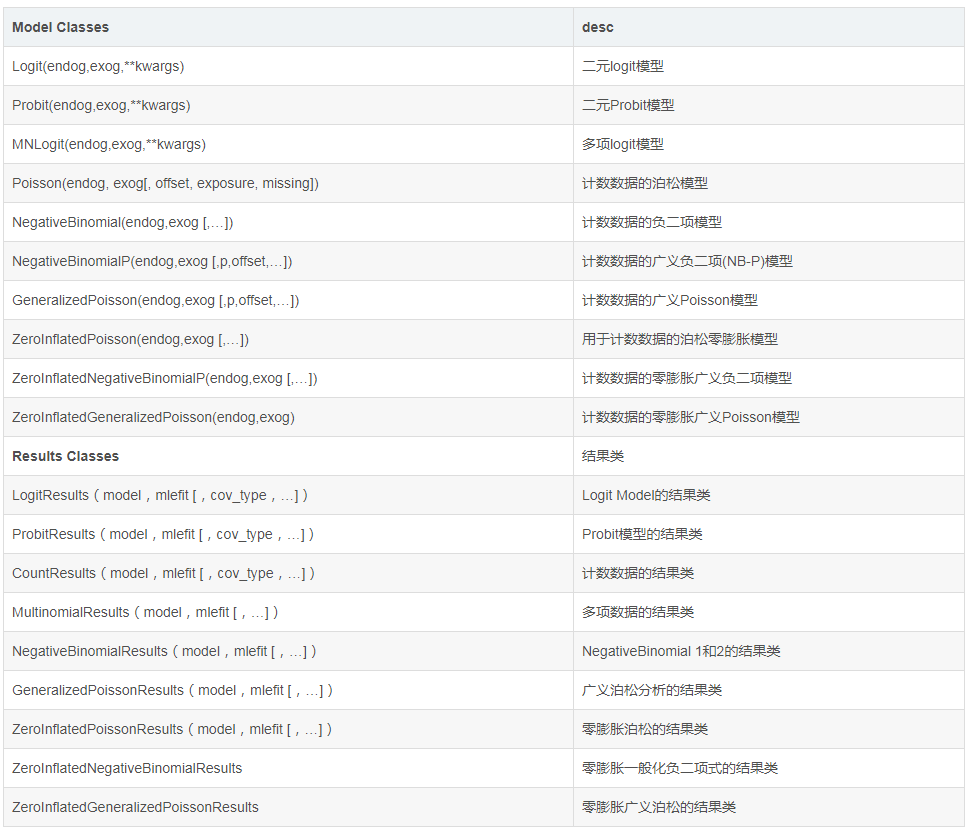

DiscreteModel是所有离散回归模型的超类。估算结果作为其中一个子类的实例返回 DiscreteResults。模型的每个类别（二进制，计数和多项）都有其自己的中级模型和结果类。这个中间类主要是为了方便实现由DiscreteModel和 定义的方法和属性DiscreteResults。

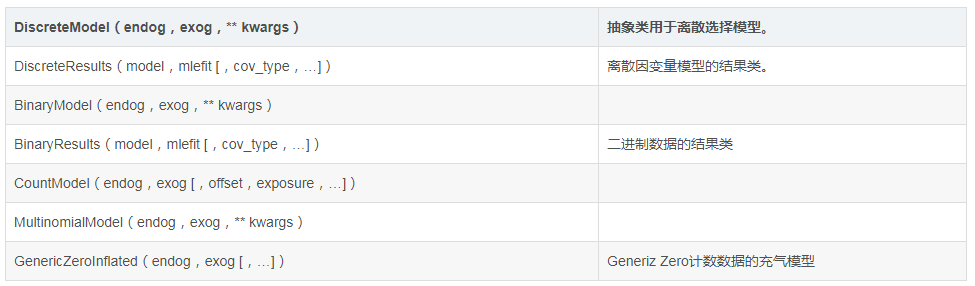

# Generalized Linear Mixed Effects Models(广义线性混合效应模型)

http://www.statsmodels.org/stable/mixed_glm.html

广义线性混合效应模型是混合效应模型的推广

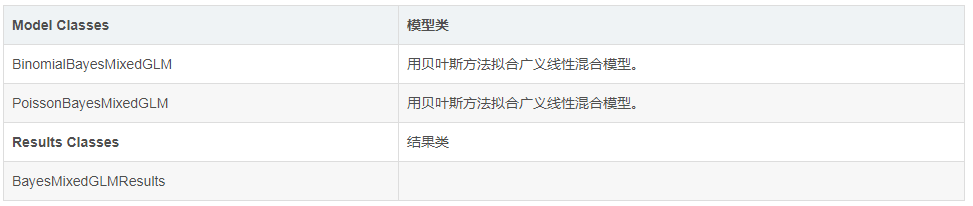